# Employee Retention

There are always people starting new jobs and retiring, and some move between jobs. Talent retention is imperative for organizational success, therefore understanding employee behavior is key to sustaining a good economy.
Kaggle Employee dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors, which has been anonymized to protect privacy while still providing valuable insights into the workforce.
https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/data

This dataset contains 8 features:
1. **Education**: Level of Education(Bachelors, Masters and PHD)
2. **Joining year**: The year of joining
3. **City**: To which city the employee belongs to
4. **PaymentTier**: Salary Tiers
5. **Age**: The age of the Employee
6. **Gender**: Male and Female
7. **EverBenched**: Everbenched (yes or no)
8. **experience in current domain**: Employee experience in terms of years

The target column is **Leave or Not** which is a binary column (0 or 1)


## Phase 1: Problem understanding

In the initial phase of our proposed data science project, our aim is to gain a deep understanding of the problem and define clear and structured objectives. This step is important to avoid solving the wrong problems. The following are the key steps and considerations.
1.	**Clearly Enunciate the Project Objectives**:
a.	Analyze the distribution of educational qualifications among employees.
b.	Investigate the length of service vary across different cities.
c.	Explore the correlation between Payment Tier and Experience in Current Domain.
d.	Determine gender distribution within the employees.
e.	Identify patterns in leave-taking behavior among employees.
2.	**Formulate the problem**: Convert the project objectives into a problem that can be solved using data science.


## Phase 2: Data preparation

In this stage, we will prepare the data to ensure it is clean, consistent, and free from errors for analysis. The following are some potential problems that we will investigate.
1. **Identify Outliers**: Outliers are data points that significantly deviate from the rest of the data. Depending on the nature of the data and the problem we are solving, we will decide on a technique for handling those outliers. While removing them might be the simple and easy way, transforming them, or treating them as special cases might derive important insights.
2. **Data Transformation and Standardization**: Some attributes might be of different scales. Thus, standardization is useful in this case.
3. **Reclassifying Categorical Variables**: Identify any categorical variables that need to be transformed or processed to make them suitable for analysis or modeling.
4. **Binning Numerical Variables**: Determine whether it is valuable to bin or categorize numerical variables, which uncover patterns that might not be visible with continuous data.
5. **Adding an Index Field**: Based on the dataset, it might be useful to add an index field for each employee, which makes it easier to track records.
6. **Handling Missing Data**: Determine a strategy to handle missing values, which may involve replacing them with estimated values or removing records with missing values.


### Basic statistics and information


In [83]:
# Libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('.\data\Employee.csv')

print(df.columns)
print(df.shape)

df.info()

df.head(10)

df.describe()

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')
(4653, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


### Data Cleaning
There are no missing values in the dataset.

In [84]:
# Check how many missing values are there in each column
print(df.isnull().sum())

# Check how many values are there in each column
print(df.apply(len))

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64
Education                    4653
JoiningYear                  4653
City                         4653
PaymentTier                  4653
Age                          4653
Gender                       4653
EverBenched                  4653
ExperienceInCurrentDomain    4653
LeaveOrNot                   4653
dtype: int64


### Categorical data values

In [85]:
print(df['Education'].unique())
print(df['City'].unique())
print(df['PaymentTier'].unique())
print(df['Gender'].unique())
print(df['EverBenched'].unique())

['Bachelors' 'Masters' 'PHD']
['Bangalore' 'Pune' 'New Delhi']
[3 1 2]
['Male' 'Female']
['No' 'Yes']


## Phase 3: Exploratory data analysis

The goal in this stage is to gain preliminary insight into the data by utilizing graphical exploration. This stage is useful to uncover patterns and visualize relationships among variables. The following are some common steps to do EDA.
1. **Explore Univariate Relationships**: Identify relationships between predictors and the target variable “Leave or Not”
2. **Explore Multivariate Relationships**: Identify correlations between multiple attributes.
3. **Binning for Predictive Value Improvement**: Determine whether binning based on predictive value could enhance the model performance. For example, we can group employees by years of experience to analyze how it’s related to taking leave.
4. **Derive New Variables**: Combine existing attributes to create new ones, which can provide additional information.


### Univariate Analysis

In [86]:
df['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

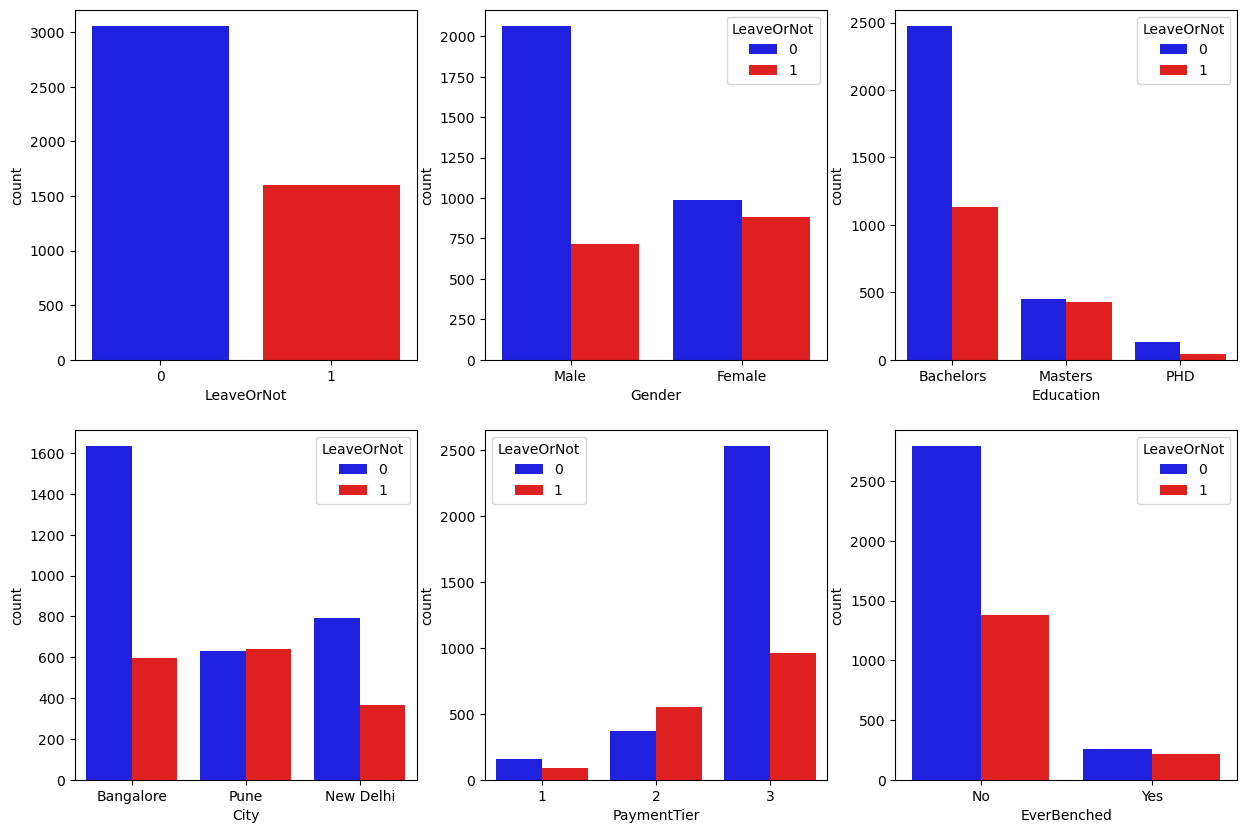

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = {1: 'red', 0: 'blue'}

# multiple subplots for LeaveOrNot, Education, City, PaymentTier, and Gender
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.countplot(ax=axes[0, 0], x='LeaveOrNot', data=df, palette=palette)
sns.countplot(ax=axes[0, 1], hue="LeaveOrNot", x='Gender', data=df, palette=palette)
sns.countplot(ax=axes[0, 2], hue="LeaveOrNot", x='Education', data=df, palette=palette)
sns.countplot(ax=axes[1, 0], hue="LeaveOrNot", x='City', data=df, palette=palette)
sns.countplot(ax=axes[1, 1], hue="LeaveOrNot", x='PaymentTier', data=df, palette=palette)
sns.countplot(ax=axes[1, 2], hue="LeaveOrNot", x='EverBenched', data=df, palette=palette)

plt.show()

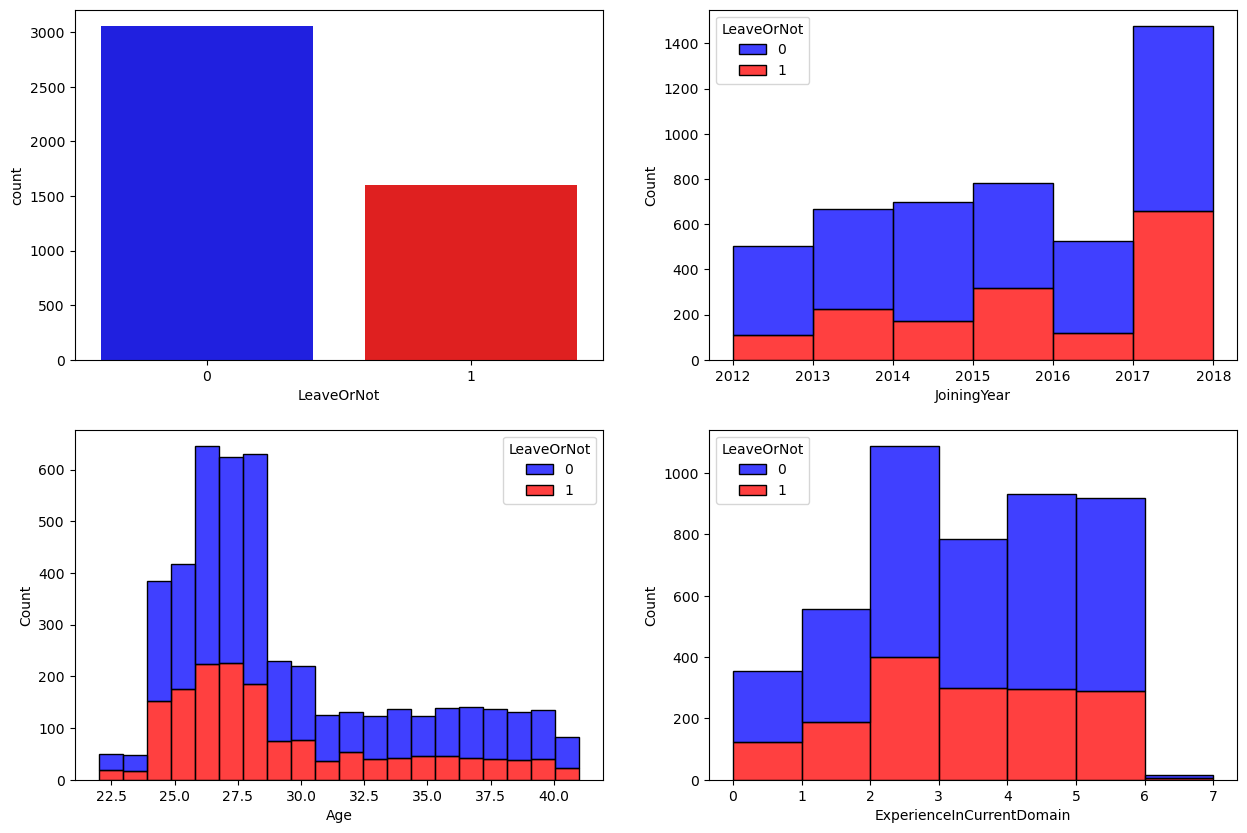

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# multiple subplots for JoiningYear, Age, and ExperienceInCurrentDomain
fig2, axes2 = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(ax=axes2[0, 0], x='LeaveOrNot', data=df, palette=palette)
sns.histplot(ax=axes2[0, 1], hue='LeaveOrNot', x='JoiningYear', data=df, bins=6, palette=palette, multiple='stack')
sns.histplot(ax=axes2[1, 0], hue='LeaveOrNot', x='Age', data=df, bins=20, palette=palette, multiple='stack')
sns.histplot(ax=axes2[1, 1], hue='LeaveOrNot', x='ExperienceInCurrentDomain', data=df, bins=7, palette=palette, multiple='stack')

plt.show()

### Multivariate Analysis

In [89]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

df_t = df.copy()

le=LabelEncoder()
df_t["Education"]= le.fit_transform(df_t["Education"])
df_t["City"]=le.fit_transform(df_t["City"])
df_t["Gender"]=le.fit_transform(df_t["Gender"])
df_t["EverBenched"]=le.fit_transform(df_t["EverBenched"])

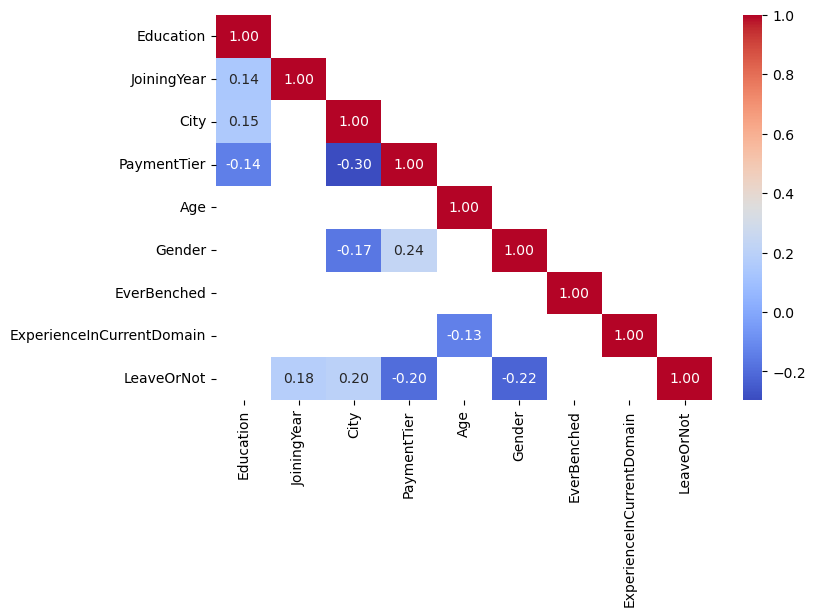

In [90]:
plt.figure(figsize=(8,5))
sns.heatmap(df_t.corr(), annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(df_t.corr().abs(), k=1) | (df_t.corr().abs() < 0.1))
plt.show()

## Phase 4: Setup

At this stage, we will have explored the data enough to understand the problem and the dataset, and we need to prepare it to be fed into the potential models by:
1. **Separating the data into train and test sets to be used for validation**: depending on how many records the dataset has.
2. **Balancing the dataset**: If any of the target column classes are not represented equally, we will apply any of the up-sampling or weighting techniques
3. **Establishing baseline model performance**: defining the minimum performance accepted for any of the used models.


In [91]:
from sklearn.model_selection import train_test_split

# splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(df_t.drop(['LeaveOrNot'], axis=1),
                                                    df_t['LeaveOrNot'],
                                                    random_state=42,
                                                    test_size=0.3,
                                                    stratify=df_t['LeaveOrNot'])

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3257, 8), (3257,), (1396, 8), (1396,))

In [92]:
from imblearn.over_sampling import SMOTE

sm=SMOTE(sampling_strategy="minority", random_state=42)
x_train_smote, y_train_smote= sm.fit_resample(x_train, y_train)

x_train_smote.shape, y_train_smote.shape

((4274, 8), (4274,))

## Phase 5: Modeling

Now the dataset is set and ready, we will feed it to different algorithms/models to uncover the relationships between the columns and target. In this phase, we need to:
1. **Selecting and implementing algorithms/models**: At least three classification models
2. **Making sure we meet the baseline performance**: each model must surpass the baseline otherwise will be dropped
3. **Fine-tuning model algorithms**: to achieve the best possible scores for the classification


### Random Forest Classifier

RandomForestClassifier(max_features=3, min_samples_split=3, n_estimators=500)
----------------------
Accuracy:[0.8223495702005731]
F1-Score:[0.7280701754385966]
Precision:[0.6916666666666667]
Recall:[0.7685185185185185]
-------------------------------
Classifiaction Reoprt
-------------------------------
              precision    recall  f1-score   support

           0      0.846     0.891     0.868       916
           1      0.769     0.692     0.728       480

    accuracy                          0.822      1396
   macro avg      0.807     0.791     0.798      1396
weighted avg      0.820     0.822     0.820      1396

Confusion_Matrix


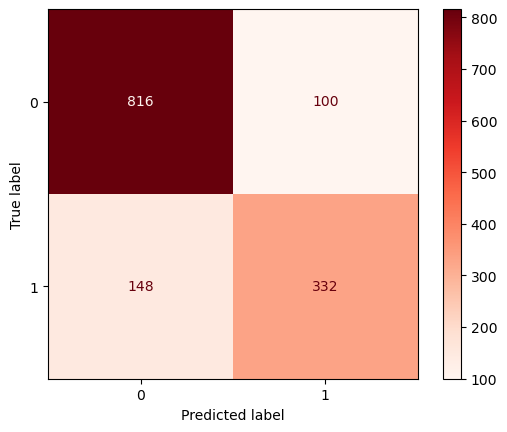

In [93]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, \
    ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

hyper_params = {"max_features": [1, 3, 8],
                "min_samples_split":[2, 3, 10],
                "min_samples_leaf":[1, 3, 10],
                "n_estimators":[100, 300, 400, 500],
                "criterion":["gini"]}

model=GridSearchCV(rf, hyper_params, cv=5, scoring="f1_macro", n_jobs=-1)
model.fit(x_train_smote,y_train_smote)
y_pred= model.predict(x_test)
print(model.best_estimator_)

print("----------------------")

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]

accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))

# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Reds")
plt.show()

### Gradient Boosting Classifier

GradientBoostingClassifier(n_estimators=500)
Accuracy:[0.832378223495702]
F1-Score:[0.7462039045553146]
Precision:[0.7166666666666667]
Recall:[0.7782805429864253]
-------------------------------
Classifiaction Reoprt
-------------------------------
              precision    recall  f1-score   support

           0      0.857     0.893     0.875       916
           1      0.778     0.717     0.746       480

    accuracy                          0.832      1396
   macro avg      0.818     0.805     0.811      1396
weighted avg      0.830     0.832     0.831      1396

Confusion_Matrix


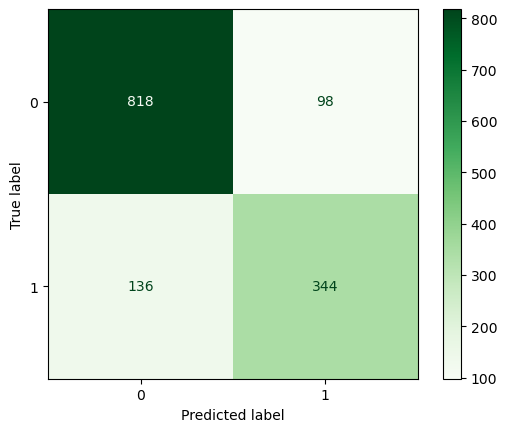

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_param_grid = {
                      "learning_rate": [0.05, 0.1, 0.02],
                      "n_estimators": [100,200,300,400,500],
                      "min_samples_split": [2,3,10],
                      "min_samples_leaf": [1,3,10]
                      }

gbc=GradientBoostingClassifier()
gbc_model= GridSearchCV(gbc, gbc_param_grid, cv=5, scoring="f1_macro", n_jobs=-1 )
gbc_model.fit(x_train_smote,y_train_smote)
y_pred= gbc_model.predict(x_test)
print(gbc_model.best_estimator_)

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]

accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))

# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Greens")
plt.show()


### Voting Classifier

Accuracy:[0.8424068767908309]
F1-Score:[0.7577092511013216]
Precision:[0.7166666666666667]
Recall:[0.8037383177570093]
-------------------------------
Classifiaction Reoprt
-------------------------------
              precision    recall  f1-score   support

           0      0.860     0.908     0.883       916
           1      0.804     0.717     0.758       480

    accuracy                          0.842      1396
   macro avg      0.832     0.812     0.820      1396
weighted avg      0.840     0.842     0.840      1396

Confusion_Matrix


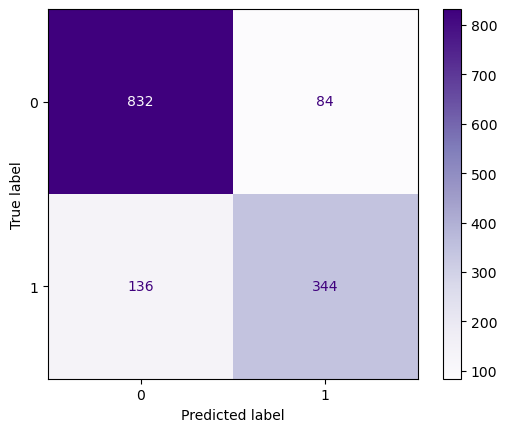

In [95]:
from sklearn.ensemble import VotingClassifier

gbc=GradientBoostingClassifier()
gbc1=GradientBoostingClassifier(learning_rate=0.05, min_samples_split=3,n_estimators=500)
rf=RandomForestClassifier(max_features=3, min_samples_leaf=3, min_samples_split=3)

voting_model= VotingClassifier(estimators=[('gradient_bosting1', gbc),('gradient_bosting2', gbc), ('gradient_bosting3', gbc), ('gradient_bosting4',gbc),('gradient_bosting5',gbc)], voting='hard', n_jobs=-1)
voting_model.fit(x_train_smote, y_train_smote)
y_pred=voting_model.predict(x_test)

accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]


accuracy_scores.append(accuracy_score(y_pred, y_test))
f1_scores.append(f1_score(y_pred, y_test))
precision_scores.append(precision_score(y_pred, y_test))
recall_scores.append(recall_score(y_pred, y_test))

# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"F1-Score:{f1_scores}")
print(f"Precision:{precision_scores}")
print(f"Recall:{recall_scores}")

print("-------------------------------")
print("Classifiaction Reoprt")
print("-------------------------------")
print(classification_report(y_test,y_pred,digits=3))
print("Confusion_Matrix")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Purples")
plt.show()


## Phase 6: Evaluation

In this phase, the testing portion will be used to determine if any of the models are good and select the best performing one based on the following:
1. Making sure it achieves the objectives from stage 1
2. Applying error analysis and determining best cost
3. Finalizing the selection of models that will be deployed


## Phase 7: Deployment

In this stage, we will deploy the application to production and make it available for use by others. Also, we will finalize our findings in the format of a publication paper, documenting all the seven stages and the exact numbers for all models’ performance.